<h2 style="text-align:center;color:#0F4C81;">
Introduction to Deep Learning
</h2>

<h3 style="color:#88B04B">What is Deep Learning?</h3>

Deep Learning is a branch of **Machine Learning (ML)** that uses **Artificial Neural Networks** to automatically learn patterns and features from data. Unlike traditional ML, which often requires manual feature engineering, deep learning models learn directly from raw data, such as images, text, and audio.

These models are called **"deep"** because they have multiple layers of interconnected "neurons" that progressively extract higher-level features from the input. Deep learning powers many modern AI systems, including **image recognition**, **speech-to-text**, **chatbots**, and **autonomous vehicles**.

In simple terms, deep learning allows machines to _learn_ the way humans do — by analyzing large amounts of data and finding patterns — but at a much larger scale.

ANNs (Artificial Neural Networks) are at the very core of Deep Learning. They are versatile, powerful, and scalable, making them ideal to tackle large and highly complex Machine Learning tasks such as classifying billions of images (e.g., Google Images), powering speech recognition services (e.g., Apple’s Siri), recommending the best videos to watch to hundreds of millions of users every day (e.g., YouTube), or learning to beat the world champion at the game of Go (DeepMind’s AlphaGo).

<h3 style="color:#88B04B;">Biological Neurons</h3>

Before we discuss artificial neurons, let’s take a quick look at a biological neuron. It is an unusual-looking cell mostly found in animal brains. It’s composed of a _cell body_ containing the nucleus and most of the cell’s complex components, many branching extensions called _dendrites_, plus one very long extension called the _axon_. The axon’s length may be just a few times longer than the cell body, or up to tens of thousands of times longer. Near its extremity the axon splits off into many branches called _telodendria_, and at the tip of these branches are minuscule structures called _synaptic terminals_ (or simply _synapses_), which are connected to the dendrites or cell bodies of other neurons. Biological neurons produce short electrical impulses called _action potentials_ (APs, or just _signals_) which travel along the axons and make the synapses release chemical signals called _neurotransmitters_. When a neuron receives a sufficient amount of these neurotransmitters within a few milliseconds, it fires its own electrical impulses (actually, it depends on the
neurotransmitters, as some of them inhibit the neuron from firing).

<div style="display:flex;justify-content:center;">
<img src="images/biological-neuron-1.png" style="width:500px;object-fit:cover;" />
</div>

Thus, individual biological neurons seem to behave in a rather simple way,
but they are organized in a vast network of billions, with each neuron
typically connected to thousands of other neurons. Highly complex
computations can be performed by a network of fairly simple neurons,
much like a complex anthill can emerge from the combined efforts of
simple ants. The architecture of biological neural networks (BNNs) is still
the subject of active research, but some parts of the brain have been
mapped, and it seems that neurons are often organized in consecutive
layers, especially in the cerebral cortex (i.e., the outer layer of your brain).

<div style="display:flex;justify-content:center;">
<img src="images/biological-neuron-2.png" style="width:600px;object-fit:cover;" />
</div>


<h3 style="color:#88B04B;">The Perceptron</h3>

The _Perceptron_ is one of the simplest ANN architectures, invented in 1957
by Frank Rosenblatt. It is based on a slightly different artificial neuron called a _threshold logic unit_ (TLU), or sometimes a _linear threshold unit_ (LTU). The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU first computes a linear function of its inputs: $z = w_1x_1 + w_2x_2 + \dots + w_nx_n + b = w^Tx + b$. Then it applies a _step function_ to the result: $h_w(x) = \text{step}(z)$. So it’s almost like Logistic Regression, except it uses a step function instead of the logistic function. Just like in Logistic Regression, the model parameters are the input weights $w$ and the bias term $b$.
<div style="display:flex;justify-content:center;">
<img src="images/threshold_logic_unit.png" style="width:500px;object-fit:cover;" />
</div>

The most common step function used in Perceptrons is the _Heaviside step function_. Sometimes the _sign_ function is used instead.

$$
\text{heaviside}(z) = \begin{cases} 0 \text{ if } z \lt  0 \\
                                    1 \text{ if } z \ge 0
\end{cases}
$$

$$
\text{sgn}(z) = \begin{cases} -1 \text{ if } z \lt  0 \\
                               0 \text{ if } z = 0 \\
                               1 \text{ if } z \gt 0
\end{cases}
$$

A single TLU can be used for simple linear binary classification. It computes a linear function of its inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise it outputs the negative class. This may remind you of Logistic Regression or linear SVM classification. You could, for example, use a single TLU to classify iris flowers based on petal length and width. Training such a TLU would require finding the right values for $w_1$, $w_2$ and $b$ (the training algorithm is discussed shortly).

A Perceptron is composed of one or more TLUs organized in a single layer,
where every TLU is connected to every input. Such a layer is called a _fully connected layer_, or a _dense_ layer. The inputs constitute the _input layer_. And since the layer of TLUs produces the final outputs, it is called the _output layer_.

<div style="display:flex;justify-content:center;">
<img src="images/perceptron_1.png" style="width:500px;object-fit:cover;" />
</div>

This Perceptron can classify instances simultaneously into three different
binary classes, which makes it a multilabel classifier. It may also be used
for multiclass classification.

Using the principles of linear algebra, the following equation can efficiently compute the outputs of a layer of artificial neurons for multiple instances simultaneously:

$$
h_{W,b}(X) = \phi(XW + b)
$$

In this equation:  
- $X$ is the matrix of input features, with each row representing an instance and each column representing a feature.  
- $W$ is the weight matrix, with rows corresponding to inputs and columns to neurons.  
- $b$ is the bias vector, containing one bias term per neuron.  
- $\phi$ is the activation function. For artificial neurons acting as threshold logic units (TLUs), it is a step function, though other activation functions will be discussed later.

So, how is a perceptron trained? The perceptron training algorithm proposed by Rosenblatt was largely inspired by **Hebb’s rule**. In his 1949 book **The Organization of Behavior** (Wiley), Donald Hebb suggested that when a biological neuron triggers another neuron often, the connection between these two neurons grows stronger. Siegrid Löwel later summarized Hebb’s idea in the catchy phrase, **“Cells that fire together, wire together”**; that is, the connection weight between two neurons tends to increase when they fire simultaneously. This rule later became known as Hebb’s rule (or *Hebbian learning*). Perceptrons are trained using a variant of this rule that takes into account the error made by the network when it makes a prediction; the perceptron learning rule reinforces connections that help reduce the error.

More specifically, the perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.

The Perceptron learning rule for updating weights is given by:

$$
w_{i,j}^{\text{next}} = w_{i,j} + \eta \cdot (y_j - \hat{y}_j) \cdot x_i
$$

In this equation:  
- $w_{i,j}$ represents the connection weight between the $i$-th input and the $j$-th neuron.  
- $x_i$ is the $i$-th input value of the current training instance.  
- $\hat{y}_j$ is the output of the $j$-th neuron for the current training instance.  
- $y_j$ is the target output of the $j$-th neuron for the current training instance.  
- $\eta$ is the learning rate.

The decision boundary of each output neuron is linear, so perceptrons are incapable of learning complex patterns (just like logistic regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution.⁠ This is called the *perceptron convergence theorem*.

Scikit-Learn provides a Perceptron class that can be used pretty much as you would expect—for example, on the iris dataset.

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [4]:
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred # predicts True and False for these 2 flowers

array([ True, False])

You may have noticed that the perceptron learning algorithm strongly resembles stochastic gradient descent. In fact Scikit-Learn’s Perceptron class is equivalent to using an `SGDClassifier` with the following hyperparameters: `loss="perceptron"`, `learning_rate="constant"`, `eta0=1` (the learning rate), and `penalty=None` (no regularization).

In their 1969 work Perceptrons, Marvin Minsky and Seymour Papert identified significant limitations of perceptrons, particularly their inability to solve certain simple problems, such as the exclusive OR (XOR) classification problem. This limitation, shared by all linear classification models like logistic regression, led to disappointment among researchers who had expected greater capabilities from perceptrons.

It turns out that some of the limitations of perceptrons can be eliminated by stacking multiple perceptrons. The resulting ANN is called a **multilayer perceptron (MLP)**. An MLP can solve the XOR problem, as you can verify by computing the output of the MLP represented on the right side of this figure: with inputs (0, 0) or (1, 1), the network outputs 0, and with inputs (0, 1) or (1, 0) it outputs 1.

<div style="display:flex;justify-content:center;">
<img src="images/xor_mlp.png" style="width:500px;object-fit:cover;" />
</div>

<h3 style="color:#88B04B;">The Multilayer Perceptroon and Backpropagation</h3>

An MLP is composed of one **input layer**, one or more layers of TLUs called **hidden layers**, and one final layer of TLUs called the **output layer**. The layers close to the input layer are usually called the **lower layers**, and the ones close to the outputs are usually called the **upper layers**.

<div style="display:flex;justify-content:center;">
<img src="images/mlp_archetecture.png" style="width:700px;object-fit:cover;" />
</div>

When an ANN contains a deep stack of hidden layers,⁠ it is called a deep neural network (DNN). The field of deep learning studies DNNs, and more generally it is interested in models containing deep stacks of computations. Even so, many people talk about deep learning whenever neural networks are involved (even shallow ones).

For many years researchers struggled to find a way to train MLPs, without success. In the early 1960s several researchers discussed the possibility of using gradient descent to train neural networks, but this requires computing the gradients of the model’s error with regard to the model parameters; it wasn’t clear at the time how to do this efficiently with such a complex model containing so many parameters, especially with the
computers they had back then.

Then, in 1970, a researcher named Seppo Linnainmaa introduced in his master’s thesis a technique to compute all the gradients automatically and efficiently. This algorithm is now called reverse-mode automatic
differentiation (or reverse-mode autodiff for short). In just two passes through the network (one forward, one backward), it is able to compute the gradients of the neural network’s error with regard to every single model parameter. In other words, it can find out how each connection weight and each bias should be tweaked in order to reduce the neural network’s error. These gradients can then be used to perform a gradient descent step. If you repeat this process of computing the gradients automatically and taking a gradient descent step, the neural network’s error will gradually drop until it eventually reaches a minimum. This combination of reverse-mode autodiff and gradient descent is now called **backpropagation** (or backprop for short).

---
We now know where neural nets came from, what their architecture is, and how to compute their outputs. We’ve also covered the backpropagation algorithm. But what exactly can we do with neural nets?

<h3 style="color:#88B04B;">Regression MLPs</h3>

First, MLPs can be used for regression tasks. If you want to predict a single value (e.g., the price of a house, given many of its features), then you just need a single output neuron: its output is the predicted value. For multivariate regression (i.e., to predict multiple values at once), you need one output neuron per output dimension. For example, to locate the center of an object in an image, you need to predict 2D coordinates, so you need two output neurons. If you also want to place a bounding box around the object, then you need two more numbers: the width and the height of the object. So, you end up with four output neurons.

Scikit-Learn includes an `MLPRegressor` class, so let’s use it to build an MLP with three hidden layers composed of 50 neurons each, and train it on the California housing dataset. For simplicity, we will use Scikit-Learn’s `fetch_california_housing()` function to load the data.

The following code starts by fetching and splitting the dataset, then it creates a pipeline to standardize the input features before sending them to the MLPRegressor. This is very important for neural networks because they are trained using gradient descent, and as we saw, gradient descent does not converge very well when the features have very different scales. Finally, the code trains the model and evaluates its validation error. The model uses the `ReLU` activation function in the hidden layers, and it uses a variant of gradient descent called `Adam` to minimize the mean squared error, with a little bit of $ℓ_2$ regularization (which you can control via the alpha hyperparameter):

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [13]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
rmse

np.float64(0.5053326657967906)

In [14]:
# compare with Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)
root_mean_squared_error(y_valid, rf_clf.predict(X_valid))

np.float64(0.50856063486333)

We get a validation RMSE of about 0.505, which is comparable to what you would get with a random forest classifier. Not too bad for a first try!

**Note that this MLP does not use any activation function for the output layer, so it’s free to output any value it wants.** This is generally fine, but if you want to guarantee that the output will always be positive, then you should use the ReLU activation function in the output layer, or the softplus activation function, which is a smooth variant of ReLU: 
$$
\text{softplus}(z) = log(1 + exp(z))
$$

Softplus is close to 0 when z is negative, and close to z when z is positive. Finally, if you want to guarantee that the predictions will always fall within a given range of values, then you should use the sigmoid function or the hyperbolic tangent, and scale the targets to the appropriate range: 0 to 1 for sigmoid and –1 to 1 for tanh. Sadly, the MLPRegressor class does not support activation functions in the output layer.

The MLPRegressor class uses the mean squared error, which is usually what you want for regression, but if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead. Alternatively, you may want to use the *Huber loss*, which is a combination of both. It is quadratic when the error is smaller than a threshold δ (typically 1) but linear when the error is larger than δ. The linear part makes it less sensitive to outliers than the mean squared error, and the quadratic part allows it to converge faster and be more precise than the mean absolute error. However, MLPRegressor only supports the MSE.

<h3 style="color:#88B04B;">Classification MLPs</h3>

MLPs can also be used for classification tasks. For a binary classification problem, you just need a single output neuron using the sigmoid activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. The estimated probability of the negative class is equal to one minus that number.

MLPs can also easily handle multilabel binary classification tasks. For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. In this case, you would need two output neurons, both using the sigmoid activation function: the first would output the probability that the email is spam, and the second would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. Note that the output probabilities do not necessarily add up to 1. This lets the model output any combination of labels: you can have nonurgent ham, urgent ham, nonurgent spam, and perhaps even urgent spam (although that would probably be an error).

If each instance can belong only to a single class, out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer. The softmax function will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1, since the classes are exclusive. This is called multiclass classification.

Regarding the loss function, since we are predicting probability distributions, the cross-entropy loss (or x-entropy or log loss for short) is generally a good choice.

<div style="display:flex;justify-content:center;">
<img src="images/mlp_relu_softmax.png" style="width:700px;object-fit:cover;" />
</div>

Scikit-Learn has an MLPClassifier class in the `sklearn.neural_network` package. It is almost identical to the `MLPRegressor` class, except that it minimizes the **cross entropy** rather than the MSE.

In [58]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [47]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42, stratify=iris.target)

In [53]:
mlp = MLPClassifier(
    hidden_layer_sizes=[10, 10],
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

clf = make_pipeline(StandardScaler(), mlp)
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=[10, 10], max_iter=1000,
                               random_state=42))])

In [54]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1])

In [55]:
y_test

array([0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1])

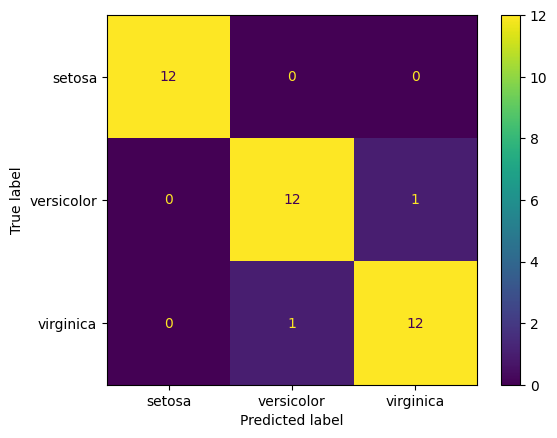

In [64]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=iris.target_names).plot();

The `MLPClassifier` automatically determines the number of output neurons based on the target labels in the dataset (`y`) provided during training. Here's how it works:

1. **Target Labels in the Iris Dataset**:
   - The Iris dataset has three classes (`setosa`, `versicolor`, and `virginica`), represented as `0`, `1`, and `2` in the target array (`y`).

2. **Output Layer Construction**:
   - During training, the `MLPClassifier` analyzes the target array (`y`) and determines the number of unique class labels using `numpy.unique(y)`.
   - The number of unique labels (in this case, `3`) determines the number of neurons in the output layer.

3. **Activation Function**:
   - For multiclass classification, `MLPClassifier` uses a **softmax activation function** in the output layer. This ensures that the output values represent probabilities for each class, summing to 1.

4. **Mapping Predictions to Classes**:
   - During inference, the model outputs a probability distribution for each input sample. The class with the highest probability is chosen as the predicted class.
